In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [12]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:30<00:00, 41.1MB/s]
100% 1.06G/1.06G [00:30<00:00, 37.1MB/s]


In [13]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [15]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)

In [26]:
#create CNN model

model = Sequential()

#convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape=(256,256,3)))
#Batch normalization layer
model.add(BatchNormalization())
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convolution layer
model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation='relu'))
#Batch normalization layer
model.add(BatchNormalization())
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convolution layer
model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation='relu'))
#Batch normalization layer
model.add(BatchNormalization())
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 116ms/step - loss: 1.2213 - accuracy: 0.6006 - val_loss: 106.4110 - val_accuracy: 0.5046
Epoch 2/10
625/625 [==============================] - 66s 106ms/step - loss: 0.5642 - accuracy: 0.7115 - val_loss: 44.0580 - val_accuracy: 0.5818
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4731 - accuracy: 0.7746 - val_loss: 58.5521 - val_accuracy: 0.6230
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4132 - accuracy: 0.8130 - val_loss: 44.8470 - val_accuracy: 0.6878
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3505 - accuracy: 0.8461 - val_loss: 195.4474 - val_accuracy: 0.5464
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2814 - accuracy: 0.8798 - val_loss: 143.8651 - val_accuracy: 0.6318
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2158 - accuracy: 0.9142 - val_loss: 76.931

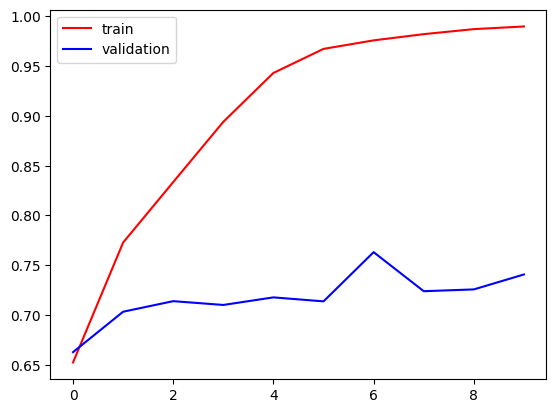

In [21]:
# Before Applying batch normalization
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

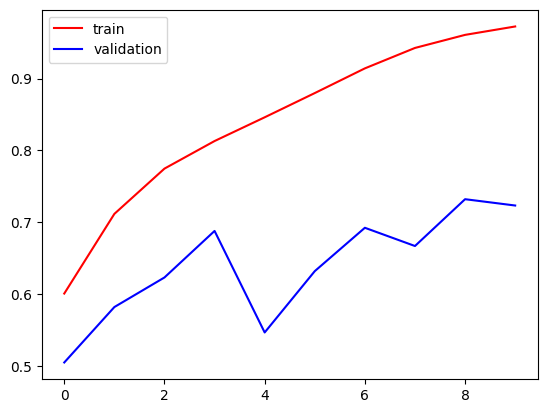

In [30]:
# After
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

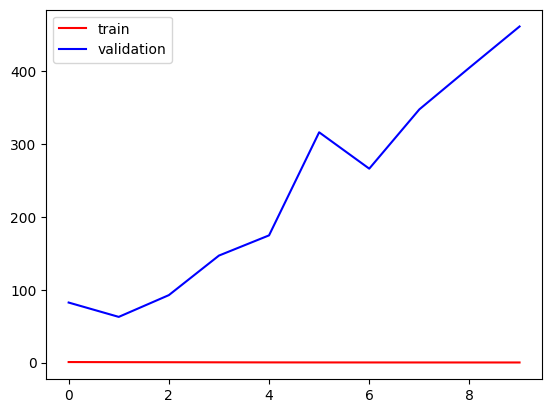

In [23]:
# Before batch normalization
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

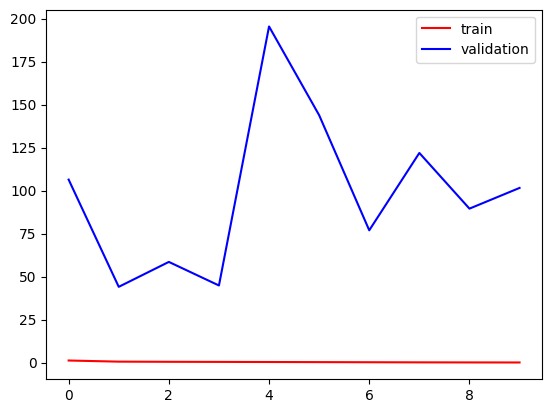

In [31]:
#After
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [24]:
# Ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity


In [32]:
# Testing
import cv2

In [41]:
test_img = cv2.imread('/content/cat.jpg')

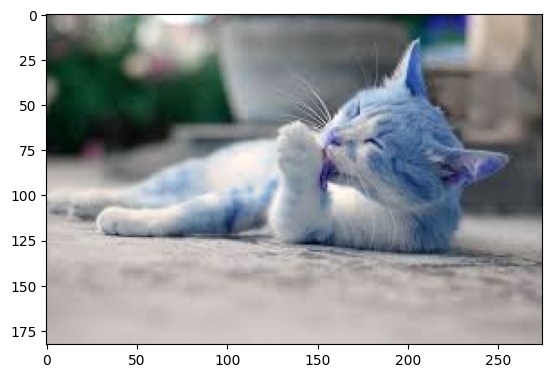

In [42]:
plt.imshow(test_img)

In [43]:
test_img.shape

(183, 275, 3)

In [44]:
#Resize
test_img = cv2.resize(test_img,(256,256))

In [45]:
test_input = test_img.reshape((1,256,256,3))

In [46]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)